<a href="https://colab.research.google.com/github/ahmedprottoy/ML-Lab/blob/main/Pneumonia/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dataset from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import dependencies


In [ ]:
!pip install tensorflow

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
tf.random.set_seed(42)

# define path

In [8]:
train_path = '/content/drive/MyDrive/Music/data/train'
test_path = '/content/drive/MyDrive/Music/data/test'
val_path = '/content/drive/MyDrive/Music/data/val'

In [10]:
img_size = (128, 128)
batch_size = 32

# Datasets

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [12]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')


Found 5220 images belonging to 2 classes.


In [14]:
val_generator = val_datagen.flow_from_directory(val_path,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 16 images belonging to 2 classes.


In [16]:
test_generator = test_datagen.flow_from_directory(test_path,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 624 images belonging to 2 classes.


# MODEL

In [61]:
Sequential??

In [62]:
MaxPooling2D??

In [32]:
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3),1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 16)       

# TRAIN MODEL

In [64]:
model. fit??

In [35]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/10
164/164 [==============================] - 148s 898ms/step - loss: 0.3401 - accuracy: 0.8492 - val_loss: 0.8053 - val_accuracy: 0.6875
Epoch 2/10
164/164 [==============================] - 147s 895ms/step - loss: 0.2170 - accuracy: 0.9117 - val_loss: 1.0001 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 148s 902ms/step - loss: 0.1966 - accuracy: 0.9207 - val_loss: 0.3314 - val_accuracy: 0.8750
Epoch 4/10
164/164 [==============================] - 161s 981ms/step - loss: 0.1760 - accuracy: 0.9308 - val_loss: 0.9265 - val_accuracy: 0.5625
Epoch 5/10
164/164 [==============================] - 157s 958ms/step - loss: 0.1695 - accuracy: 0.9314 - val_loss: 0.5310 - val_accuracy: 0.6875
Epoch 6/10
164/164 [==============================] - 155s 944ms/step - loss: 0.1607 - accuracy: 0.9393 - val_loss: 1.2224 - val_accuracy: 0.6250
Epoch 7/10
164/164 [==============================] - 152s 924ms/step - loss: 0.1550 - accuracy: 0.9425 - val_loss: 0.7276 -

In [ ]:
history.history

# Plot Performances

In [23]:
from matplotlib import pyplot as plt

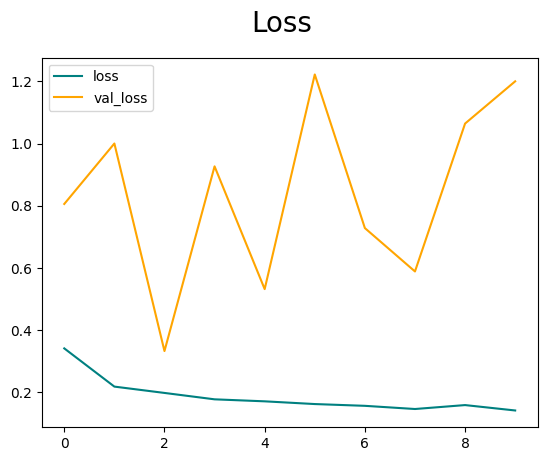

In [36]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

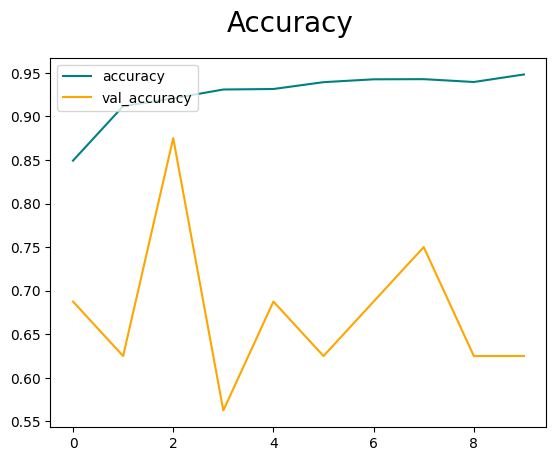

In [37]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate the model on the test set

In [31]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Accuracy: {test_acc}')

20/20 [==============================] - 382s 20s/step - loss: 0.2648 - accuracy: 0.9167
Test Accuracy: 0.9166666865348816


# checking if model predicting accurately

In [41]:
import cv2
import numpy as np

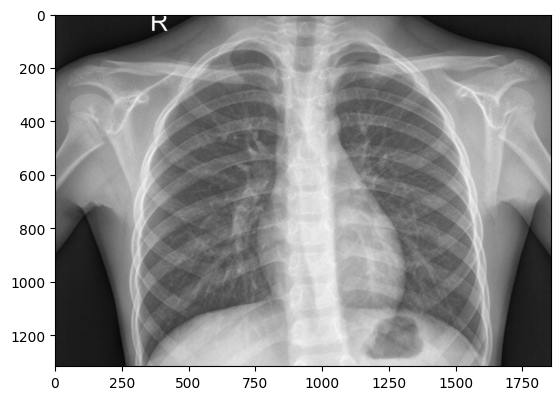

In [83]:
img = cv2.imread('/content/drive/MyDrive/Music/data/test/NORMAL/IM-0001-0001.jpeg')
plt.imshow(img)
plt.show()


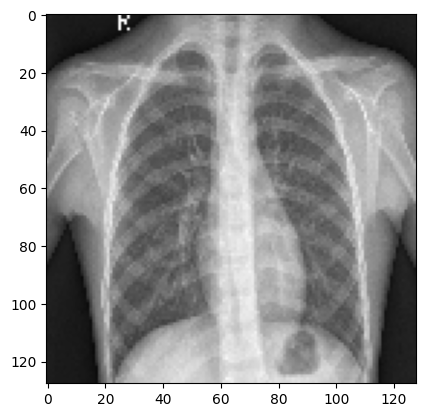

In [84]:
resize = tf.image.resize(img, (128,128))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [85]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [87]:
if yhat > 0.5:
    print(f'Predicted class is Pneumonia')
else:
    print(f'Predicted class is not Pneumonia')

Predicted class is not Pneumonia
